In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_mae(max_depth, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators=5, max_depth=max_depth, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(preds_val, val_y)
    return mae

In [6]:
df = pd.read_csv("E:/Projects/Learning/ML/Melbourne Housing Data/melb_data.csv")
df.dropna(axis=0, inplace=True)
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6196 entries, 1 to 12212
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6196 non-null   object 
 1   Address        6196 non-null   object 
 2   Rooms          6196 non-null   int64  
 3   Type           6196 non-null   object 
 4   Price          6196 non-null   float64
 5   Method         6196 non-null   object 
 6   SellerG        6196 non-null   object 
 7   Date           6196 non-null   object 
 8   Distance       6196 non-null   float64
 9   Postcode       6196 non-null   float64
 10  Bedroom2       6196 non-null   float64
 11  Bathroom       6196 non-null   float64
 12  Car            6196 non-null   float64
 13  Landsize       6196 non-null   float64
 14  BuildingArea   6196 non-null   float64
 15  YearBuilt      6196 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6196 non-null   float64
 18  Longtitude  

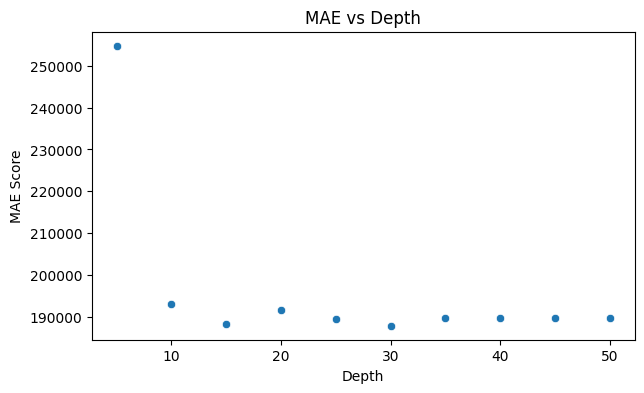

In [11]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 
                      "Longtitude", 'BuildingArea', 'Distance', 'Bedroom2']
new_features = []
y = df['Price'].reset_index(drop=True)
X = df[melbourne_features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1, test_size=0.1)

mae_by_depth = {}
for i in range(5, 51, 5):
    my_mae = get_mae(i, train_X, val_X, train_y, val_y)
    mae_by_depth[i] = my_mae

plt.figure(figsize=(7, 4))
sns.scatterplot(x=mae_by_depth.keys(), y=mae_by_depth.values())
plt.title('MAE vs Depth')
plt.xlabel("Depth")
plt.ylabel("MAE Score")
plt.show()

In [12]:
mae_by_depth

{5: 254837.31246565015,
 10: 192949.87773885462,
 15: 188289.56631234378,
 20: 191606.29397759293,
 25: 189477.52571021885,
 30: 187812.88709677418,
 35: 189550.1751612903,
 40: 189550.1751612903,
 45: 189550.1751612903,
 50: 189550.1751612903}